
# Assignment : Model Performance Evaluation in a Marketing Campaign
## Prince Praveen


## Step 1: Create the Dataset

We will generate a synthetic dataset for customer classification, consisting of two features and two classes. This dataset will allow us to visualize the decision boundaries of different models.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [2]:
X

array([[ 0.60103418,  1.5353525 ],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [ 2.84431506,  0.21129354],
       [-0.02587554,  1.6192578 ],
       [ 3.64147835,  0.75692519]])

In [3]:
y

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

# Plotting the dataset

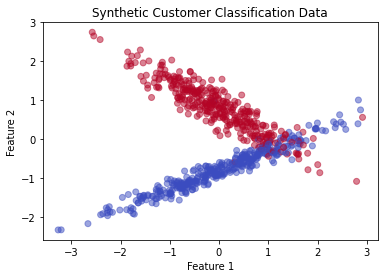

In [4]:
# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title("Synthetic Customer Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Marketing Campaign Data
## Let us discuss what False Positives, False Negatives and other associated metrics would mean in our given context.



In the context of a marketing campaign, the goal is to identify and engage potential customers who are likely to respond positively to an offer (such as buying a product, subscribing to a service, or any other desired outcome). The performance of models used to predict customer responses, such as, logistic regression, SVC or K-Nearest Neighbors (KNN) can be evaluated using metrics that help distinguish between various types of errors. Two error types in this context are False Positives (FP) and False Negatives (FN).
Let us take a look at each of them.

### FALSE POSITIVES (FP)
Definition: In this case, the model incorrectly predicts that a customer will respond positively to the marketing campaign, but in reality, they do not.

Implication: The company spends marketing resources (such as sending an email or offering a discount) to someone who ultimately does not respond. While this mistake costs the company some resources (e.g., $5 per customer), it is a relatively small loss compared to the potential gain from contacting actual responders.

### FALSE NEGATIVES (FN)
Definition: Here, the model predicts that a customer will not respond to the campaign, but in reality, they would have responded positively if contacted.

Implication: This represents a missed opportunity for the company, as a potential sale or engagement is lost. The cost of missing this opportunity is significantly higher, as it directly impacts revenue. For example, if the average profit from a customer who responds positively is 200 dollars, each FN represents $200 loss


## Assumptions derived from a stakeholder meeting to discuss the business impact of FNs and FPs of our model

### Quantifying the Impact

We recently conducted an in-depth discussion with key stakeholders, including representatives from the marketing, finance, and strategy teams, to thoroughly understand the financial implications of both False Positives (FP) and False Negatives (FN) in our marketing campaign model. Through this collaborative effort, we were able to identify and quantify the associated costs, allowing us to align our focus on improving the model's performance based on the business's strategic priorities.

#### False Positive Cost:
Cost per FP: On average, contacting a customer—whether through email, direct mail, or other marketing outreach costs the company $5.

Impact of FP: When a customer who does not respond is mistakenly predicted to respond (FP), the company only loses this relatively small marketing expenditure per customer. These are manageable losses, as the company can afford to spend on outreach without significant financial risk. In this case, the cost is simply absorbed as a part of the marketing budget allocated for broader campaigns.

Example Calculation:
If our model results in 10,000 false positives over a campaign, the total expenditure on these unnecessary contacts would be 50,000 dollars (10,000 FPs × $5 per contact).
This cost can be seen as a relatively low-risk marketing investment, especially when compared to the potential returns from correctly predicted responders (true positives).


#### False Negative Cost:
Cost per FN: In contrast, missing a potential customer—where the model predicts that a customer will not respond, but they actually would have, comes with a much higher cost. The company estimates that each customer who responds to the campaign generates an average profit of 200 dollars. A False Negative, therefore, results in a missed revenue opportunity of $200 per customer.

Wider Financial Implications:
In our discussions with the finance team, we conducted further analysis and determined that every 1,000 missed responders (FNs) results in a total loss of $200,000 in potential revenue.
This substantial figure illustrates the significant financial risk that FNs pose. Missing even a small percentage of responders could lead to considerable losses in revenue, which the company cannot afford to overlook.


### Risk Analysis

False Positive Tolerance:

Even if the number of false positives were to increase by 10%, the company could absorb this additional cost without severe financial strain. For example, 10,000 false positives would result in a total cost of $50,000, which is manageable and would have limited impact on profitability.
While this means we may spend slightly more on outreach to customers who do not respond, the cost is relatively minor when compared to the potential upside of converting positive responders.

False Negative Risk:

However, if the model's false negatives were to increase by 10 percent, the potential revenue loss could be devastating. For instance, 10,000 false negatives—representing missed opportunities—would result in a loss of approximately 2 million dollars (10,000 FNs × $200 in lost profit per responder).
This substantial loss underscores the importance of minimizing false negatives. Missing out on these potential responders not only reduces immediate revenue but also affects future customer relationships and growth opportunities, as these customers may never be reached again.


## Discussion on the evaluation metrics



#### Accuracy

Definition: Accuracy measures the proportion of all correct predictions (both positive and negative) out of all predictions made by the model.
Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)
Relevance: Accuracy can be misleading in this context, especially if the number of non-responders is much higher than responders (i.e., class imbalance). A model that predicts mostly non-responders can achieve high accuracy but fail to capture the actual positive responders, which is what matters most to us.

#### Precision

Definition: Precision is the ratio of true positives (correctly predicted responders) to all predicted positives (both true and false positives).
Formula: Precision = TP / (TP + FP)
Relevance: Precision tells us how many of the predicted responders actually responded. While precision is important to understand the efficiency of our marketing resources, it is not as crucial in this context because we are more concerned about not missing potential responders (FNs).

#### Recall (Sensitivity)

Definition: Recall measures the proportion of actual responders that the model correctly identifies.
Formula: Recall = TP / (TP + FN)
Relevance: Recall is critical here because it directly relates to our ability to minimize False Negatives. High recall ensures that we are identifying most of the potential responders, even at the expense of mistakenly contacting some non-responders (FPs).
Conclusion: Since False Negatives are costly, improving recall is crucial for reducing missed opportunities.

#### F1 Score

Definition: The F1 Score is the harmonic mean of Precision and Recall, providing a balance between the two.
Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
Relevance: The F1 score gives an overall measure of the model’s accuracy in predicting positive responses. In cases where we want to balance precision and recall, this is useful. However, given that recall is our primary concern, we may not prioritize F1 over recall.


### Why Recall Should Be the Primary Focus
AS mentioned before, our marketing campaign has a much higher cost associated with False Negatives (missed potential customers) than False Positives (contacting non-responders). Therefore, we need to focus on Recall to ensure that we are capturing as many potential customers as possible, even if it means accepting more false positives. The increase in marketing costs due to more FPs is negligible compared to the potential revenue loss from FNs.



## Step 2: Hyperparameter Tuning

We will perform hyperparameter tuning for KNN, Logistic Regression, and SVC using `GridSearchCV`. This will help us find the best parameters for each model.


In [6]:
# Define parameter grids
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_log_reg = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
svc = SVC()

# Perform Grid Search for each model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=1)
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, verbose=1)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, verbose=1)

# Fit the models
grid_search_knn.fit(X_train, y_train)
grid_search_log_reg.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

# Print best parameters for each model
print("Best KNN parameters:", grid_search_knn.best_params_)
print("Best Logistic Regression parameters:", grid_search_log_reg.best_params_)
print("Best SVC parameters:", grid_search_svc.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best KNN parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best Logistic Regression parameters: {'C': 10, 'solver': 'lbfgs'}
Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



## Step 3: Plot Decision Boundaries

We will plot the decision boundaries for each model using contour plots. This will allow us to visualize how each model separates the data.


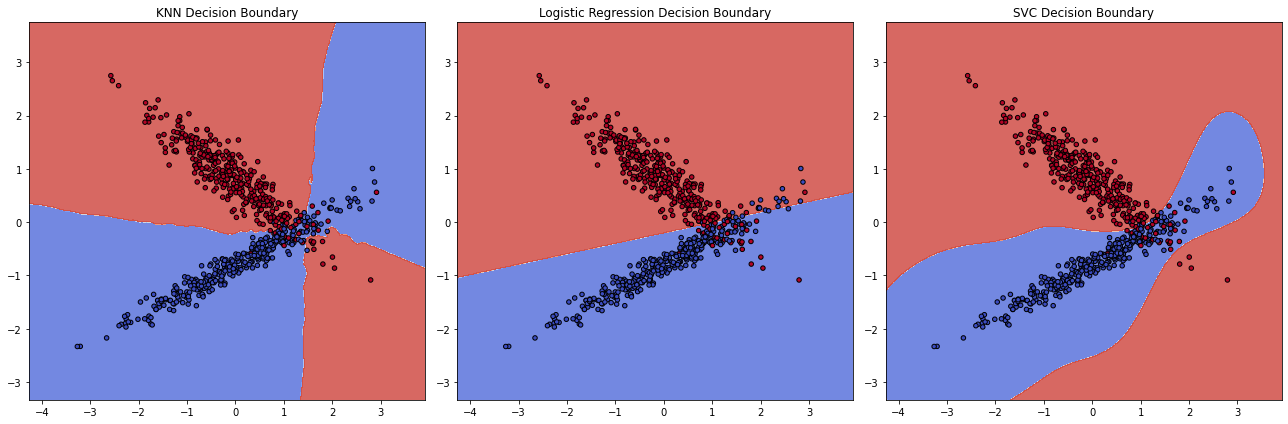

In [7]:

def plot_decision_boundary(model, X, y, title, ax):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict classes for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and training points
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
    ax.set_title(title)

# Retrain models with the best parameters
knn_best = grid_search_knn.best_estimator_
log_reg_best = grid_search_log_reg.best_estimator_
svc_best = grid_search_svc.best_estimator_

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundary(knn_best, X_train, y_train, "KNN Decision Boundary", axes[0])
plot_decision_boundary(log_reg_best, X_train, y_train, "Logistic Regression Decision Boundary", axes[1])
plot_decision_boundary(svc_best, X_train, y_train, "SVC Decision Boundary", axes[2])

plt.tight_layout()
plt.show()



## Step 4: Evaluate the Models

We will evaluate each model's performance using accuracy on the test set.


In [9]:

# Predict on the test set
y_pred_knn = knn_best.predict(X_test)
y_pred_log_reg = log_reg_best.predict(X_test)
y_pred_svc = svc_best.predict(X_test)



### Evaluation Metrics: F1, Accuracy, Precision, Recall

In [13]:


# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

# Calculate precision, recall, and F1 score
knn_precision = precision_score(y_test, y_pred_knn)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
svc_precision = precision_score(y_test, y_pred_svc)

knn_recall = recall_score(y_test, y_pred_knn)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
svc_recall = recall_score(y_test, y_pred_svc)

knn_f1 = f1_score(y_test, y_pred_knn)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
svc_f1 = f1_score(y_test, y_pred_svc)

# Print results for each model
print(f"{'Model':<25}{'Accuracy':<12}{'Precision':<12}{'Recall':<12}{'F1 Score':<12}")
print("="*65)
print(f"{'KNN':<25}{knn_accuracy:<12.4f}{knn_precision:<12.4f}{knn_recall:<12.4f}{knn_f1:<12.4f}")
print(f"{'Logistic Regression':<25}{log_reg_accuracy:<12.4f}{log_reg_precision:<12.4f}{log_reg_recall:<12.4f}{log_reg_f1:<12.4f}")
print(f"{'SVC':<25}{svc_accuracy:<12.4f}{svc_precision:<12.4f}{svc_recall:<12.4f}{svc_f1:<12.4f}")


Model                    Accuracy    Precision   Recall      F1 Score    
KNN                      0.9333      0.9586      0.9085      0.9329      
Logistic Regression      0.8833      0.9275      0.8366      0.8797      
SVC                      0.9267      0.9712      0.8824      0.9247      


### Initial Observations: 
The KNN model demonstrates strong performance with high accuracy (93.33%) and a well-balanced F1 score (93.29%), indicating its effectiveness in handling both false positives and false negatives. Its slightly higher precision (95.86%) compared to recall (90.85%) suggests that while it minimizes false positives, it may miss a few more potential positive responders. In comparison, the SVC also shows strong precision (97.12%) but lower recall (88.24%), meaning it might miss more potential customers. Logistic Regression, while having slightly lower overall metrics, maintains a reasonable balance, with a recall of 83.66% showing fewer missed positives but slightly more false positives than KNN and SVC. So far, KNN shows the best recall results.

### Confusion Matrix For Each Evaluation Model

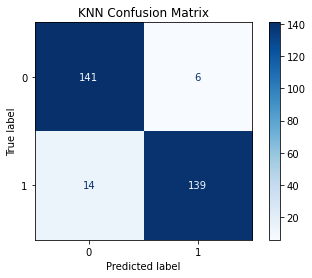

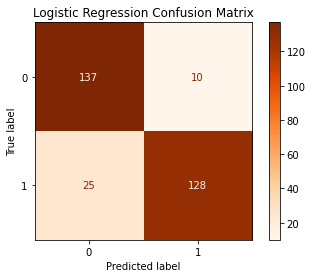

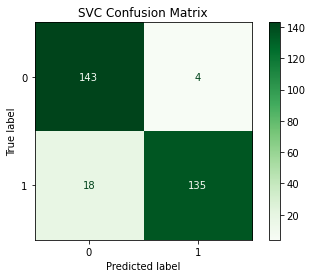

In [15]:

# Confusion matrices for each model
knn_cm = confusion_matrix(y_test, y_pred_knn)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
svc_cm = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp_knn.plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

# Plot confusion matrix for Logistic Regression
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)
disp_log_reg.plot(cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot confusion matrix for SVC
disp_svc = ConfusionMatrixDisplay(confusion_matrix=svc_cm)
disp_svc.plot(cmap='Greens')
plt.title("SVC Confusion Matrix")
plt.show()


True Positive (TP): Correctly predicted customers who responded to the marketing campaign (potential customers reached successfully).

False Positive (FP): Customers who were predicted to respond but did not (extra marketing effort, minimal cost).

True Negative (TN): Correctly predicted customers who did not respond (no unnecessary marketing effort).

False Negative (FN): Customers who would have responded but were predicted not to (missed revenue opportunities).
Reducing FN is critical, as these represent lost potential revenue.

#### KNN
TN = 141
| FN = 14
| TP = 139
| FP = 6

#### Logistic Regression
TN = 137
| FN = 25
| TP = 128
| FP = 10

#### SVC
TN = 143
| FN = 18
| TP = 135
| FP = 4

## PR Curve

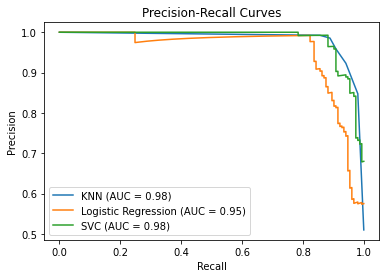

In [16]:

# Compute Precision-Recall curve and AUC for each model
y_probs_knn = knn_best.predict_proba(X_test)[:, 1]
y_probs_log_reg = log_reg_best.predict_proba(X_test)[:, 1]
y_probs_svc = svc_best.decision_function(X_test)  # For SVC, use decision_function instead of predict_proba

# Precision-Recall curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_probs_knn)
auc_pr_knn = auc(recall_knn, precision_knn)
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_pr_knn:.2f})')

# Precision-Recall curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_probs_log_reg)
auc_pr_log_reg = auc(recall_log_reg, precision_log_reg)
plt.plot(recall_log_reg, precision_log_reg, label=f'Logistic Regression (AUC = {auc_pr_log_reg:.2f})')

# Precision-Recall curve for SVC
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_probs_svc)
auc_pr_svc = auc(recall_svc, precision_svc)
plt.plot(recall_svc, precision_svc, label=f'SVC (AUC = {auc_pr_svc:.2f})')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


### Observations

KNN (AUC = 0.98) and SVC (AUC = 0.98) have very similar performance based on their PR curves, with both maintaining high precision across a broad range of recall values.
Toward the right side (high recall, closer to 1), their precision dips slightly, but they still maintain strong performance overall.
Logistic Regression (AUC = 0.95) has slightly lower performance compared to KNN and SVC.
The curve for Logistic Regression dips earlier than the other two models, indicating a trade-off where precision drops as recall increases.
This could suggest that Logistic Regression struggles a bit more to maintain high precision when trying to capture all positive cases (high recall).

## ROC Curve

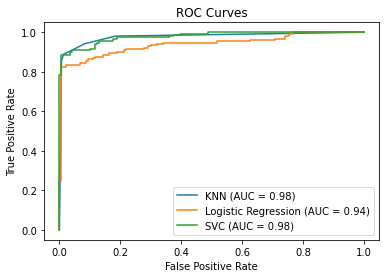

In [18]:

# ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# ROC curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_probs_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_probs_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# ROC curve for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_probs_svc)
roc_auc_svc = roc_auc_score(y_test, y_probs_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


### Observations

#### KNN (AUC = 0.98):

KNN has an AUC of 0.98, which is extremely close to 1. This indicates that KNN is a very good classifier, with a very low false positive rate while maintaining a high true positive rate.
The ROC curve is closer to the top-left corner of the plot, indicating that for almost all thresholds, the model does a great job of distinguishing between classes.

#### Logistic Regression (AUC = 0.94):

Logistic regression performs slightly worse than KNN, with an AUC of 0.94. This is still a very good score, but it indicates that it has a slightly higher false positive rate compared to KNN and SVC.
The curve is less steep, particularly at the beginning, which indicates that the model is not as sharp at reducing false positives when trying to maximize true positives.

#### SVC (AUC = 0.98):

The SVC model has an AUC of 0.98, very similar to KNN. This suggests that both SVC and KNN are performing equally well in separating the positive and negative classes.
Like KNN, its curve is closer to the top-left corner, indicating that the model handles trade-offs between true positives and false positives well.

## Impact of different thresholds on Model Performance

In [27]:

# Step 1: Get predicted probabilities for each model
y_probs_knn = knn_best.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (positive)
y_probs_log_reg = log_reg_best.predict_proba(X_test)[:, 1]
y_probs_svc = svc_best.decision_function(X_test)    # SVC uses decision_function instead of predict_proba

# Step 2: Define thresholds to test
thresholds = [0.2, 0.3, 0.5, 0.7]

# Function to calculate accuracy, precision, and recall at different thresholds
def evaluate_model(y_probs, model_name):
    results = []

    for threshold in thresholds:
        # Apply threshold
        y_pred_thresh = (y_probs >= threshold).astype(int)

        # Calculate accuracy, precision, and recall
        accuracy = accuracy_score(y_test, y_pred_thresh)
        precision = precision_score(y_test, y_pred_thresh, zero_division=0)
        recall = recall_score(y_test, y_pred_thresh)

        # Append the results in a list
        results.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        })
    
    # Convert list of results into a DataFrame for a neat display
    return pd.DataFrame(results)

# Step 3: Get results for each model
knn_results = evaluate_model(y_probs_knn, 'KNN Model')
log_reg_results = evaluate_model(y_probs_log_reg, 'Logistic Regression Model')
svc_results = evaluate_model(y_probs_svc, 'SVC Model')

# Display the results for each model
print("KNN Model Results:")
print(knn_results)

print("\nLogistic Regression Model Results:")
print(log_reg_results)

print("\nSVC Model Results:")
print(svc_results)


KNN Model Results:
   Threshold  Accuracy  Precision    Recall
0        0.2  0.900000   0.847458  0.980392
1        0.3  0.930000   0.923077  0.941176
2        0.5  0.933333   0.958621  0.908497
3        0.7  0.936667   0.985507  0.888889

Logistic Regression Model Results:
   Threshold  Accuracy  Precision    Recall
0        0.2  0.846667   0.812865  0.908497
1        0.3  0.876667   0.881579  0.875817
2        0.5  0.883333   0.927536  0.836601
3        0.7  0.896667   0.991935  0.803922

SVC Model Results:
   Threshold  Accuracy  Precision    Recall
0        0.2  0.936667   0.992647  0.882353
1        0.3  0.936667   0.992647  0.882353
2        0.5  0.930000   0.992537  0.869281
3        0.7  0.920000   0.992366  0.849673


### Observations

## KNN Model
Threshold 0.2: High recall (0.98), meaning it correctly identifies most positive cases. However, precision (0.85) is lower, indicating that some of the predicted positives are false positives.

Threshold 0.3: Balanced performance with good accuracy (0.93), precision (0.92), and recall (0.94). This is a balanced threshold.

Threshold 0.5: Precision improves to 0.96, but recall drops to 0.91, meaning fewer false positives but some positive cases are missed.

Threshold 0.7: The highest precision (0.99), but recall is the lowest (0.89), indicating more positive cases are missed. This threshold prioritizes precision over recall.

## Logistic Regressor Model
Threshold 0.2: High recall (0.91) but low precision (0.81), meaning many false positives.

Threshold 0.3: More balanced between precision (0.88) and recall (0.88), making it a good middle-ground threshold.

Threshold 0.5: Higher precision (0.93) but lower recall (0.84), which means the model is better at avoiding false positives but misses some true positives.

Threshold 0.7: Almost perfect precision (0.99), but recall (0.80) suffers. This threshold is skewed towards precision, so the model is very conservative in predicting positives.

## SVC Model
Threshold 0.2 & 0.3: Both thresholds give identical performance in terms of accuracy (0.94), precision (0.99), and recall (0.88). This is likely the sweet spot for this model, offering both high precision and recall.

Threshold 0.5: Precision remains very high (0.99), but recall drops slightly to 0.87.

Threshold 0.7: Again, very high precision (0.99), but recall drops further to 0.85, making it similar to other models where higher thresholds emphasize precision at the cost of recall.



# Final Thoughts

After reviewing the results, I've come to the conclusion that KNN at threshold 0.3 offers the best balance. While KNN at 0.2 provides a very high recall (0.98), which would minimize false negatives, KNN at 0.3 still maintains a strong recall (0.94) while also improving precision (0.92). This strikes a better balance between minimizing false negatives and keeping false positives manageable.

The accuracy at 0.3 is also higher (0.93), which shows that overall, the model performs well. Although recall is my top priority, precision still plays an important role in ensuring that the results are not overwhelmed with false positives.

That said, considering both scenarios, I believe it would be wise to have a follow-up meeting with the stakeholders to discuss these trade-offs in more detail. This will allow us to decide together which model and threshold will best meet our real-world needs, given the importance of both minimizing false negatives and maintaining some balance with precision.